In [1]:
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f"CUDA Available: {cuda_available}")

# Check the CUDA version
cuda_version = torch.version.cuda
print(f"CUDA Version: {cuda_version}")

# Check the number of available GPUs
num_gpus = torch.cuda.device_count()
print(f"Number of GPUs: {num_gpus}")

# If GPUs are available, print their names
for i in range(num_gpus):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    folder_path = 'C://Users//path'

CUDA Available: True
CUDA Version: 12.1
Number of GPUs: 1
GPU 0: NVIDIA GeForce RTX 3060 Laptop GPU


## Make Prediction 

In [5]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO('best36_class.pt')

# Run inference on a single image file
image_path = 'data/Duhat_test'  # Replace with your actual image file path
results = model.predict(image_path, save=True, imgsz=640, conf=0.5)

# Loop through the results of the single image
for result in results:
    # Get class names, confidences, and bounding boxes (if applicable)
    for cls, conf in zip(result.names, result.boxes.conf):
        print(f"Class: {cls}, Confidence: {conf * 100:.2f}%")


image 1/50 D:\Dataset\data\Duhat_test\env_Duhat A (12).jpg: 640x640 1 Duhat, 32.4ms
image 2/50 D:\Dataset\data\Duhat_test\env_Duhat A (15).jpg: 640x640 1 Duhat, 31.7ms
image 3/50 D:\Dataset\data\Duhat_test\env_Duhat B (1).jpg: 640x640 2 Duhats, 34.1ms
image 4/50 D:\Dataset\data\Duhat_test\env_Duhat B (15).jpg: 640x640 1 Duhat, 32.1ms
image 5/50 D:\Dataset\data\Duhat_test\env_Duhat B (20).jpg: 640x640 1 Duhat, 32.2ms
image 6/50 D:\Dataset\data\Duhat_test\env_Duhat B (23).jpg: 640x640 1 Duhat, 32.8ms


KeyboardInterrupt: 

### Make Prediction with subfolder 

In [17]:
import os
import numpy as np
from ultralytics import YOLO

# Load your YOLOv8 model
model = YOLO('best36_class.pt')

# Folder containing images (with subfolders for each class)
base_folder = 'dsds/val/images'  # Update with your actual folder path

# Initialize lists to store ground truth and predicted confidence scores
y_true = []
y_scores = []

# Define your target class if it's a binary classification (for ROC analysis)
target_class = 'class_1'  # Replace with your target class (positive class)

# Loop through the subfolders and images
for root, dirs, files in os.walk(base_folder):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):  # Add other formats as needed
            image_path = os.path.join(root, file)

            # Run inference on the image using YOLOv8
            results = model.predict(image_path, save=True, imgsz=640, conf=0.5)
            
            # Get ground truth from the folder name (assuming folder is the class label)
            true_label = os.path.basename(root)

            # Append ground truth (binary: 1 if the class is the target class, else 0)
            y_true.append(1 if true_label == target_class else 0)

            # Extract confidence scores for each detection in the image
            if results and results[0].boxes:
                # We take the highest confidence score for the image
                max_conf = max(results[0].boxes.conf)  # Get max confidence of bounding boxes
                y_scores.append(max_conf)
            else:
                # If no detection, we consider confidence as 0 for this image
                y_scores.append(0)

# Convert y_true and y_scores to numpy arrays for further analysis (like ROC curve)
y_true = np.array(y_true)
y_scores = np.array(y_scores)

# Print the true labels and confidence scores
print("Ground truth labels:", y_true)
print("Predicted confidence scores:", y_scores)



image 1/1 D:\Dataset\dsds\val\images\env_Acacia-B-11-_jpg.rf.10c34f1798e2d76e6a48f153493f3514.jpg: 640x640 (no detections), 31.9ms
Speed: 6.5ms preprocess, 31.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict13

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-B-9-_jpg.rf.ae05d5dd270ef9f6860d36982879bd91.jpg: 640x640 (no detections), 32.9ms
Speed: 4.8ms preprocess, 32.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict13

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-C-13-_jpg.rf.af59d0d0db9a98597d85096509667128.jpg: 640x640 1 Acacia, 32.5ms
Speed: 7.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict13

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-C-15-_jpg.rf.9b8800fd9216e8967a9eec6cdaa68efb.jpg: 640x640 1 Acacia, 32.0ms
Speed: 8.1ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

## ROC Curve test

In [1]:
import os
import numpy as np
from ultralytics import YOLO

# Load your YOLOv8 model
model = YOLO('best36_class.pt')

# Folder containing images for predictions (no class subfolders)
image_folder = 'data/Duhat_test'  # Update with your actual folder path

# Load labels from the text file with the specified encoding
label_file = 'labels36class.txt'  # Path to the labels file
with open(label_file, 'r', encoding='utf-8') as f:  # Specify encoding
    labels = [line.strip() for line in f.readlines()]

# Initialize lists to store ground truth and predicted confidence scores
y_true = []
y_scores = []

# Loop through the images in the folder
for idx, file in enumerate(os.listdir(image_folder)):
    if file.endswith(('.jpg', '.png', '.jpeg')):  # Add other formats as needed
        image_path = os.path.join(image_folder, file)

        # Run inference on the image using YOLOv8
        results = model.predict(image_path, save=True, imgsz=640, conf=0.5)

        # Get the true label based on the index of the file
        true_label = labels[idx] if idx < len(labels) else None

        # Append ground truth (binary: 1 if the class is the target class, else 0)
        if true_label is not None:
            y_true.append(1 if true_label == 'class_1' else 0)  # Change 'class_1' to your target class

        # Extract confidence scores for each detection in the image
        if results and results[0].boxes:
            # We take the highest confidence score for the image
            max_conf = max(results[0].boxes.conf.cpu())  # Move tensor to CPU before max
            y_scores.append(max_conf)
        else:
            # If no detection, we consider confidence as 0 for this image
            y_scores.append(0)

# Convert y_true and y_scores to numpy arrays for further analysis (like ROC curve)
y_true = np.array(y_true)
y_scores = np.array(y_scores)  # No need to modify this line

# Print the true labels and confidence scores
print("Ground truth labels:", y_true)
print("Predicted confidence scores:", y_scores)



image 1/1 D:\Dataset\data\Duhat_test\env_Duhat A (12).jpg: 640x640 1 Duhat, 6.1ms
Speed: 8.9ms preprocess, 6.1ms inference, 166.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2

image 1/1 D:\Dataset\data\Duhat_test\env_Duhat A (15).jpg: 640x640 1 Duhat, 10.0ms
Speed: 0.0ms preprocess, 10.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2

image 1/1 D:\Dataset\data\Duhat_test\env_Duhat B (1).jpg: 640x640 2 Duhats, 10.0ms
Speed: 0.0ms preprocess, 10.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2

image 1/1 D:\Dataset\data\Duhat_test\env_Duhat B (15).jpg: 640x640 1 Duhat, 2.9ms
Speed: 4.0ms preprocess, 2.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2

image 1/1 D:\Dataset\data\Duhat_test\env_Duhat B (20).jpg: 640x640 1 Duhat, 0.0ms
Speed: 10.0ms preprocess, 0.0ms inference, 


image 1/1 D:\Dataset\dsds\val\images\env_Acacia-B-11-_jpg.rf.10c34f1798e2d76e6a48f153493f3514.jpg: 640x640 (no detections), 31.9ms
Speed: 6.9ms preprocess, 31.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict3

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-B-9-_jpg.rf.ae05d5dd270ef9f6860d36982879bd91.jpg: 640x640 (no detections), 31.2ms
Speed: 0.0ms preprocess, 31.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict3

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-C-13-_jpg.rf.af59d0d0db9a98597d85096509667128.jpg: 640x640 1 Acacia, 46.9ms
Speed: 0.0ms preprocess, 46.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict3

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-C-15-_jpg.rf.9b8800fd9216e8967a9eec6cdaa68efb.jpg: 640x640 1 Acacia, 34.6ms
Speed: 9.1ms preprocess, 34.6ms inference, 6.0ms postprocess per image at shape (1

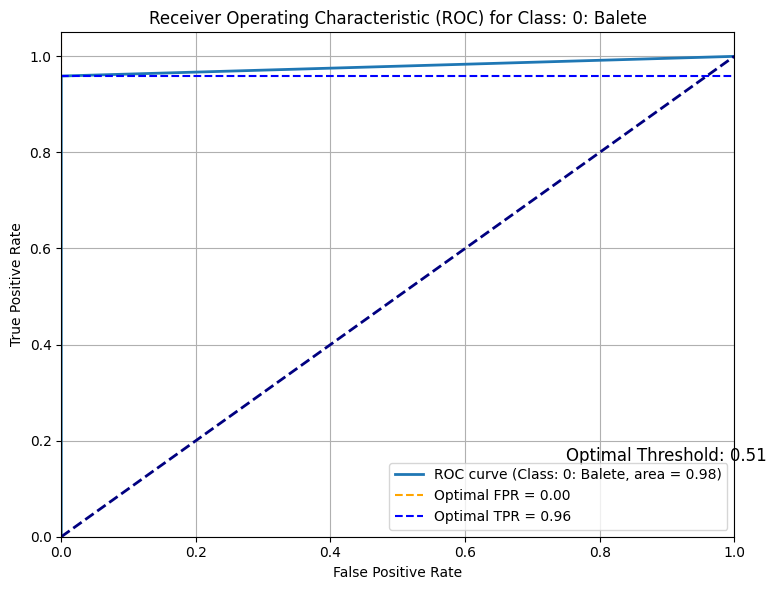

Class '1: Bayabas': Optimal Threshold: 0.57
Class '1: Bayabas': True Positive Rate at Optimal Threshold: 0.96
Class '1: Bayabas': False Positive Rate at Optimal Threshold: 0.30


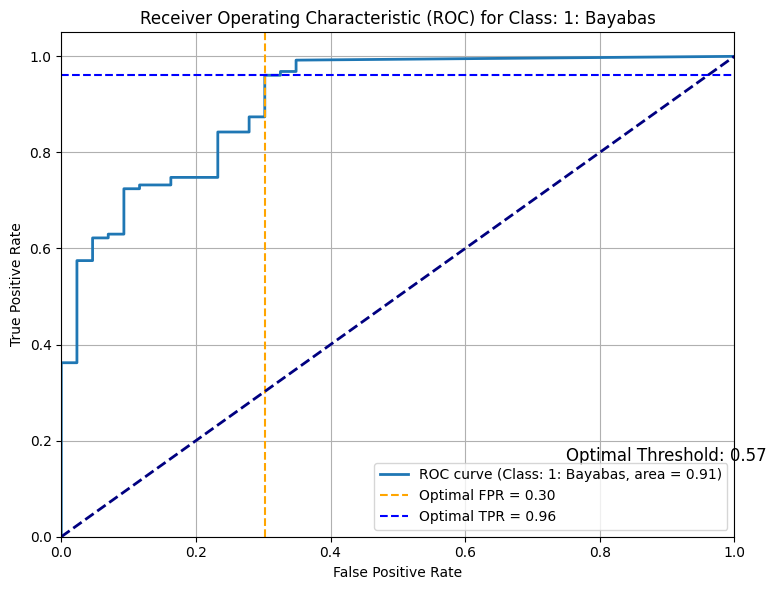

Class '2: Dita': Optimal Threshold: 0.51
Class '2: Dita': True Positive Rate at Optimal Threshold: 1.00
Class '2: Dita': False Positive Rate at Optimal Threshold: 0.00


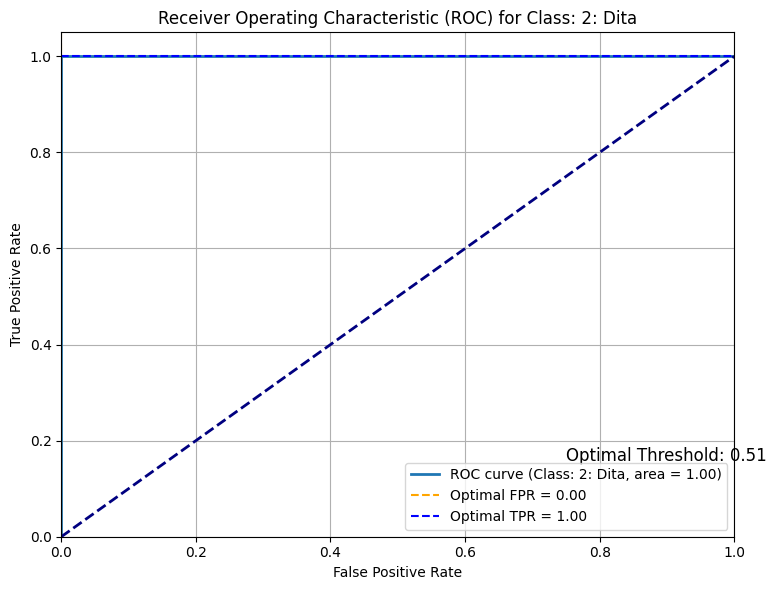

Class '3: Ilang-Ilang': Optimal Threshold: 0.51
Class '3: Ilang-Ilang': True Positive Rate at Optimal Threshold: 0.98
Class '3: Ilang-Ilang': False Positive Rate at Optimal Threshold: 0.00


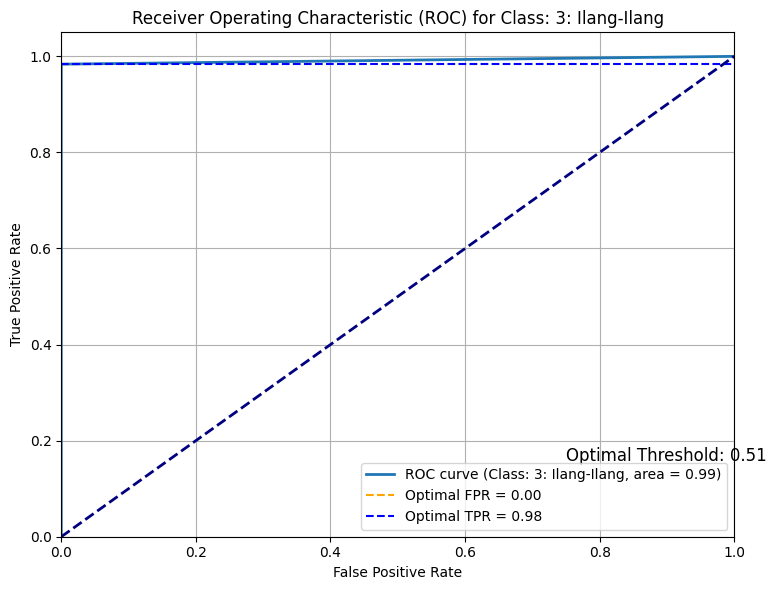

Class '4: Langka': Optimal Threshold: 0.54
Class '4: Langka': True Positive Rate at Optimal Threshold: 0.99
Class '4: Langka': False Positive Rate at Optimal Threshold: 0.10


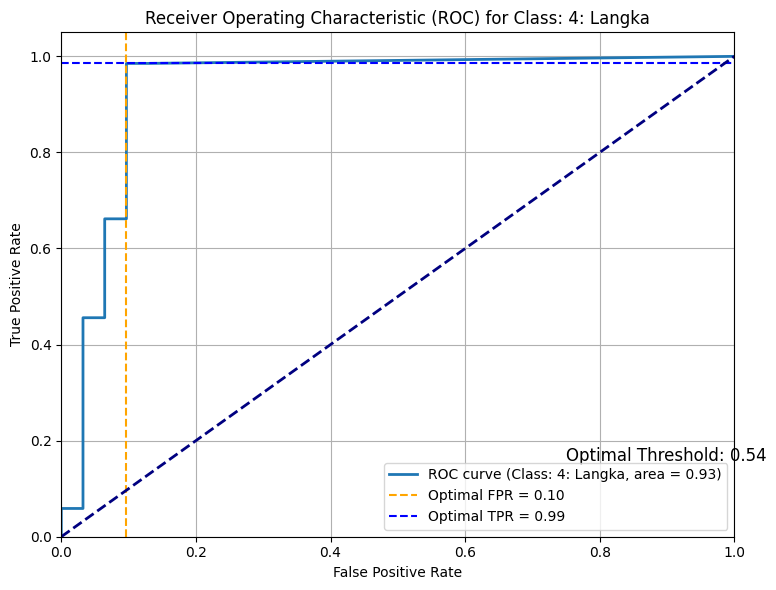

Class '5: Mangga': Optimal Threshold: 0.58
Class '5: Mangga': True Positive Rate at Optimal Threshold: 0.99
Class '5: Mangga': False Positive Rate at Optimal Threshold: 0.09


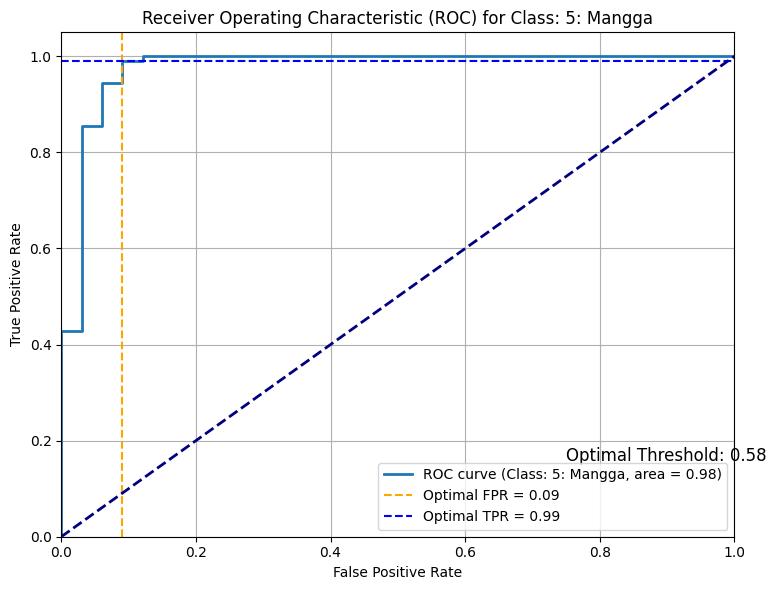

Class '6: Mahogany': Optimal Threshold: 0.77
Class '6: Mahogany': True Positive Rate at Optimal Threshold: 0.93
Class '6: Mahogany': False Positive Rate at Optimal Threshold: 0.03


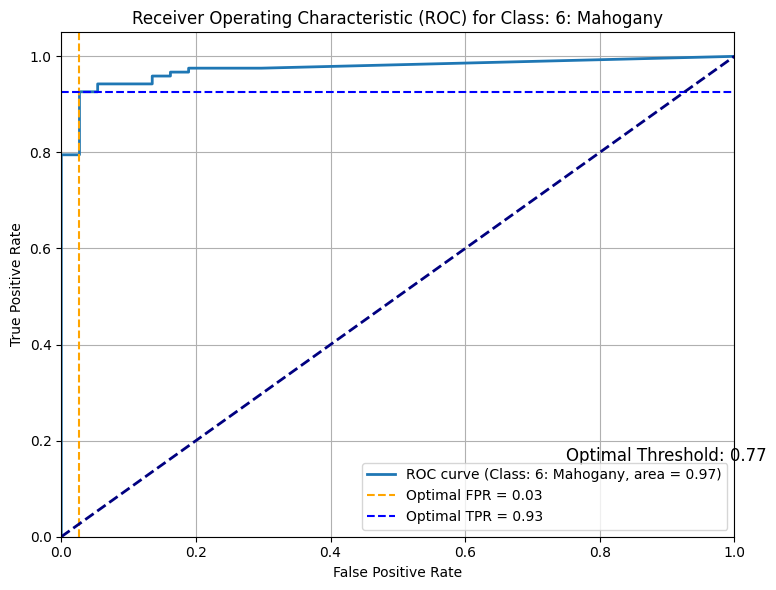

Class '7: Duhat': No positive samples found, skipping ROC calculation.
Class '8: Palo-Maria': Optimal Threshold: 0.58
Class '8: Palo-Maria': True Positive Rate at Optimal Threshold: 0.98
Class '8: Palo-Maria': False Positive Rate at Optimal Threshold: 0.06


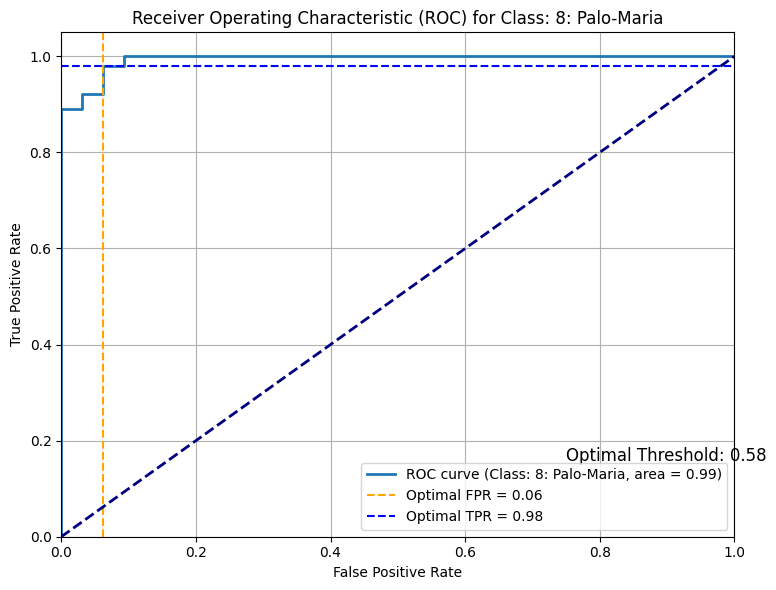

Class '9: Narra': Optimal Threshold: 0.55
Class '9: Narra': True Positive Rate at Optimal Threshold: 0.95
Class '9: Narra': False Positive Rate at Optimal Threshold: 0.15


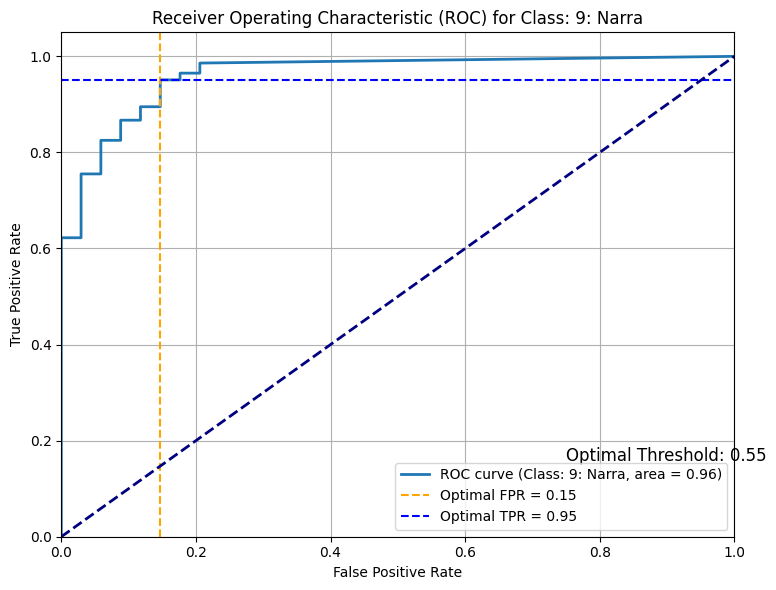

Class '10: Yakal': Optimal Threshold: 0.85
Class '10: Yakal': True Positive Rate at Optimal Threshold: 1.00
Class '10: Yakal': False Positive Rate at Optimal Threshold: 0.03


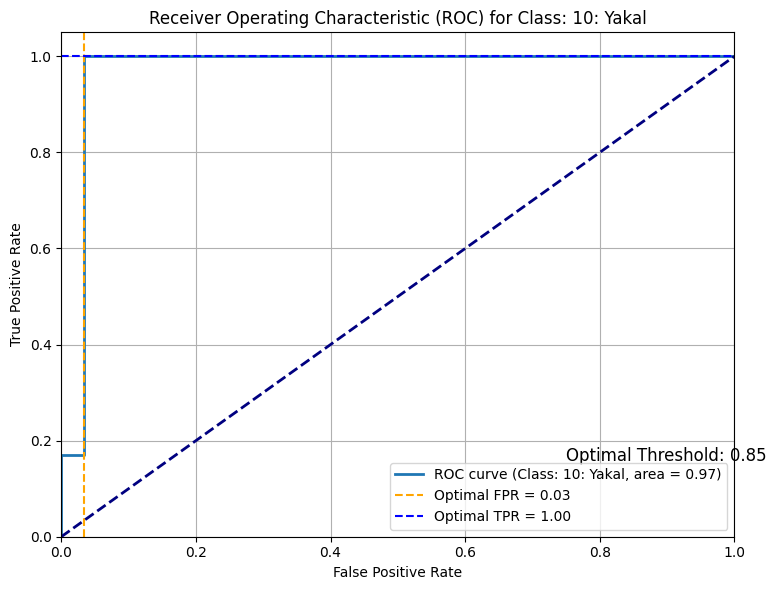

Class '11: Alibangbang': Optimal Threshold: 0.94
Class '11: Alibangbang': True Positive Rate at Optimal Threshold: 0.97
Class '11: Alibangbang': False Positive Rate at Optimal Threshold: 0.00


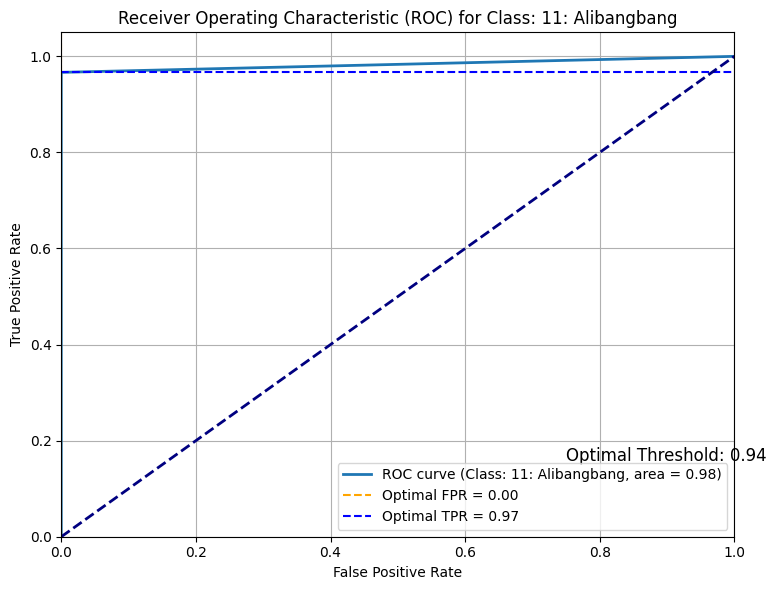

Class '12: Apitong': Optimal Threshold: 0.64
Class '12: Apitong': True Positive Rate at Optimal Threshold: 0.95
Class '12: Apitong': False Positive Rate at Optimal Threshold: 0.00


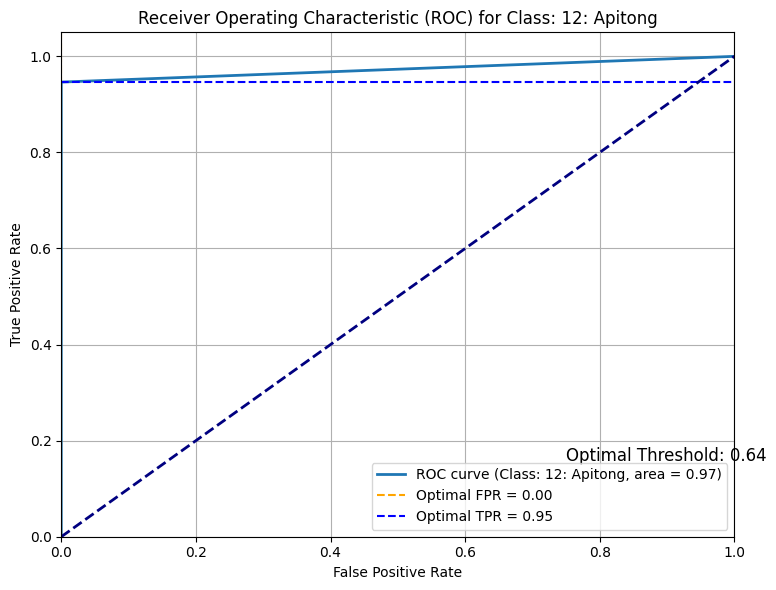

Class '13: Kamagong': Optimal Threshold: 0.93
Class '13: Kamagong': True Positive Rate at Optimal Threshold: 1.00
Class '13: Kamagong': False Positive Rate at Optimal Threshold: 0.00


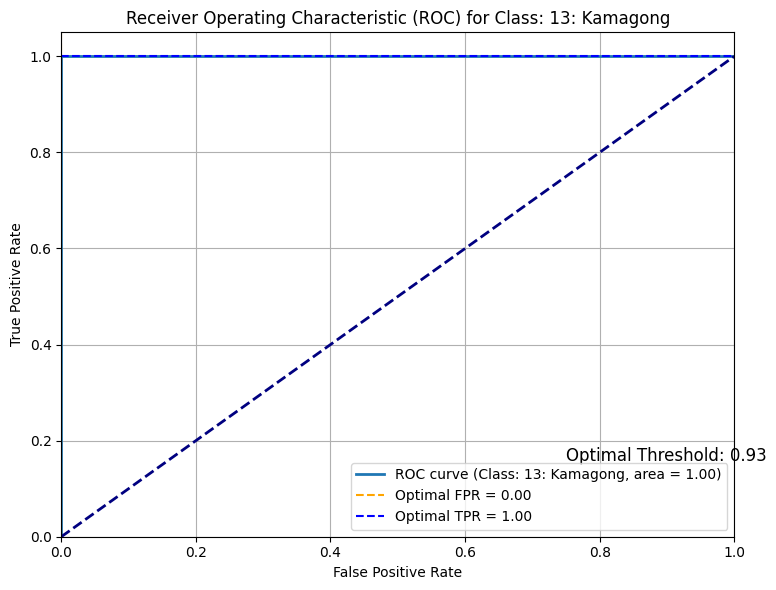

Class '14: Kalios': Optimal Threshold: 0.63
Class '14: Kalios': True Positive Rate at Optimal Threshold: 0.91
Class '14: Kalios': False Positive Rate at Optimal Threshold: 0.00


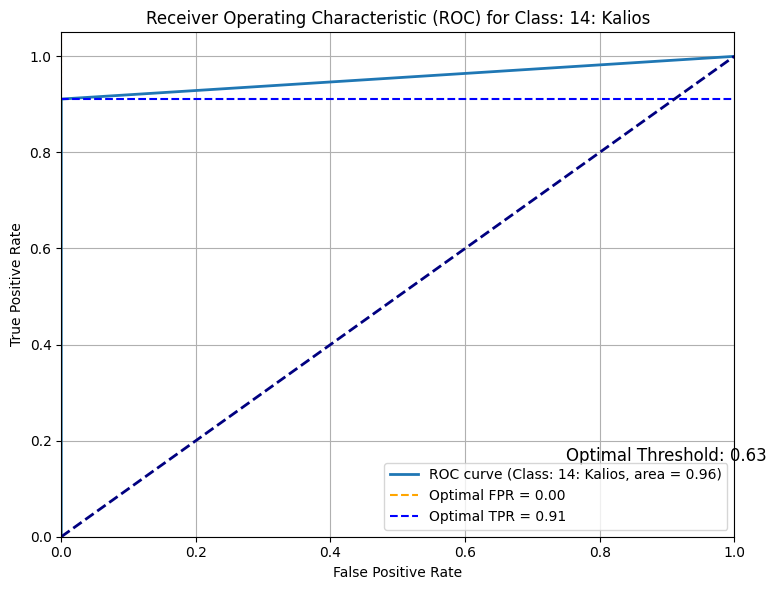

Class '15: Acacia': Optimal Threshold: 0.85
Class '15: Acacia': True Positive Rate at Optimal Threshold: 0.98
Class '15: Acacia': False Positive Rate at Optimal Threshold: 0.00


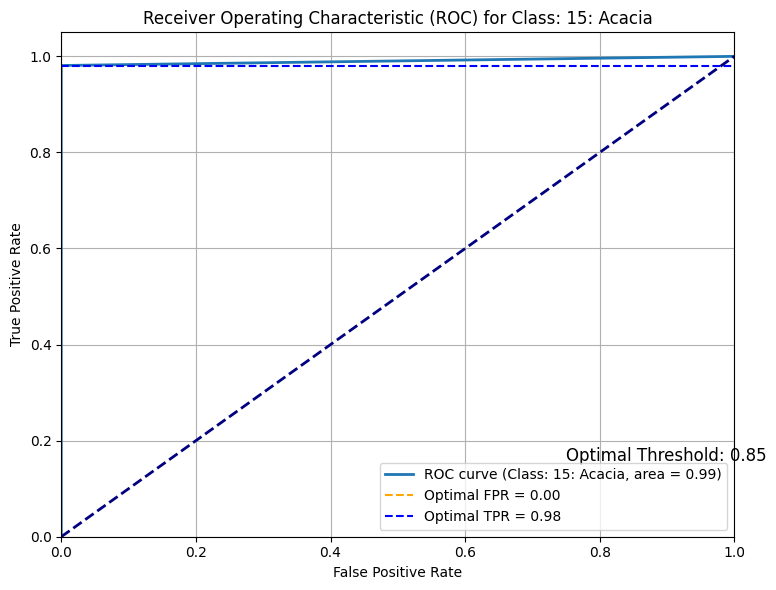

Class '16: Madre-Cacao': Optimal Threshold: 0.60
Class '16: Madre-Cacao': True Positive Rate at Optimal Threshold: 1.00
Class '16: Madre-Cacao': False Positive Rate at Optimal Threshold: 0.00


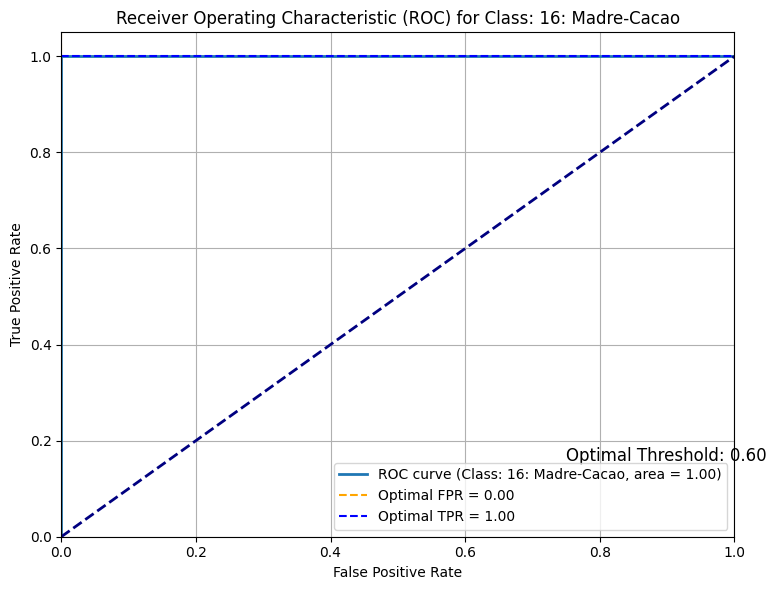

Class '17: Eucalyptus': No positive samples found, skipping ROC calculation.
Class '18: Scramble-Egg': No positive samples found, skipping ROC calculation.
Class '19: Alagao': No positive samples found, skipping ROC calculation.
Class '20: Sintores': No positive samples found, skipping ROC calculation.
Class '21: Tibig': No positive samples found, skipping ROC calculation.
Class '22: Amugis': No positive samples found, skipping ROC calculation.
Class '23: Balayong': No positive samples found, skipping ROC calculation.
Class '24: Bani': No positive samples found, skipping ROC calculation.
Class '25: Banaba': No positive samples found, skipping ROC calculation.
Class '26: Barako': No positive samples found, skipping ROC calculation.
Class '27: Binunga': No positive samples found, skipping ROC calculation.
Class '28: Betis': No positive samples found, skipping ROC calculation.
Class '29: Dao': No positive samples found, skipping ROC calculation.
Class '30: Asis': No positive samples found

In [2]:
import os
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import torch

# Load your YOLOv8 model
model = YOLO('best36_class.pt')

# Folder containing images (with no subfolders for classes)
image_folder = 'dsds/val/images'  # Update with your actual image folder path
label_folder = 'dsds/val/labels'  # Update with your actual label folder path

# Load your labels from the text file
with open('labels36class.txt', 'r') as f:  # Update with your labels file path
    labels = [line.strip() for line in f.readlines()]

# Initialize lists to store ground truth and predicted confidence scores for all classes
y_true = {i: [] for i in range(len(labels))}  # A dictionary to store true labels per class
y_scores = {i: [] for i in range(len(labels))}  # A dictionary to store scores per class

# Loop through the images in the image folder
for file in os.listdir(image_folder):
    if file.endswith(('.jpg', '.png', '.jpeg')):  # Add other formats as needed
        image_path = os.path.join(image_folder, file)

        # Corresponding label file path
        label_file = os.path.join(label_folder, file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt'))

        # Run inference on the image using YOLOv8
        results = model.predict(image_path, save=True, imgsz=640, conf=0.5)

        # Initialize true labels for all classes as 0 (no detection)
        true_labels = [0] * len(labels)

        # Read the corresponding label file to get true labels
        if os.path.exists(label_file):
            with open(label_file, 'r') as lf:
                for line in lf.readlines():
                    class_index = int(line.split()[0])  # Assuming the class index is the first element in the label file
                    true_labels[class_index] = 1  # Mark as detected for the class

        # Check detected classes and append the results
        if results and results[0].boxes:
            for box in results[0].boxes:
                class_index = int(box.cls)
                max_conf = box.conf.item() if isinstance(box.conf, torch.Tensor) else box.conf
                y_true[class_index].append(true_labels[class_index])
                y_scores[class_index].append(max_conf)
        else:
            # If no detections, append zeros for all classes
            for i in range(len(labels)):
                y_true[i].append(true_labels[i])
                y_scores[i].append(0)

# Now calculate the ROC curve for each class
for i in range(len(labels)):
    # Convert lists to numpy arrays
    y_true_class = np.array(y_true[i])
    y_scores_class = np.array(y_scores[i])

    # Check if there's enough data to compute the ROC curve for the class
    if np.sum(y_true_class) > 0:
        # Calculate ROC curve for the current class
        fpr, tpr, thresholds = roc_curve(y_true_class, y_scores_class)

        # Calculate the optimal threshold using Youden's J statistic
        J = tpr - fpr
        optimal_idx = np.argmax(J)
        optimal_threshold = thresholds[optimal_idx]
        optimal_tpr = tpr[optimal_idx]
        optimal_fpr = fpr[optimal_idx]

        # Print optimal threshold and corresponding TPR, FPR for the class
        print(f"Class '{labels[i]}': Optimal Threshold: {optimal_threshold:.2f}")
        print(f"Class '{labels[i]}': True Positive Rate at Optimal Threshold: {optimal_tpr:.2f}")
        print(f"Class '{labels[i]}': False Positive Rate at Optimal Threshold: {optimal_fpr:.2f}")

        # Simplified Plotting of ROC Curve for the class
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve (Class: {labels[i]}, area = {auc(fpr, tpr):.2f})')

        # Plot dashed lines for the optimal threshold
        plt.axvline(x=optimal_fpr, color='orange', linestyle='--', label=f'Optimal FPR = {optimal_fpr:.2f}')
        plt.axhline(y=optimal_tpr, color='blue', linestyle='--', label=f'Optimal TPR = {optimal_tpr:.2f}')

        # Annotate the optimal threshold value on the right side of the figure
        plt.text(0.75, 0.15, f'Optimal Threshold: {optimal_threshold:.2f}', fontsize=12, verticalalignment='bottom', color='black')

        # Basic plot settings
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) for Class: {labels[i]}')
        plt.legend(loc='lower right')
        plt.grid()
        plt.tight_layout()  # Adjust layout
        plt.show()
    else:
        print(f"Class '{labels[i]}': No positive samples found, skipping ROC calculation.")



image 1/1 D:\Dataset\dsds\val\images\env_Acacia-B-11-_jpg.rf.10c34f1798e2d76e6a48f153493f3514.jpg: 640x640 (no detections), 20.0ms
Speed: 0.0ms preprocess, 20.0ms inference, 20.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict5

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-B-9-_jpg.rf.ae05d5dd270ef9f6860d36982879bd91.jpg: 640x640 (no detections), 10.0ms
Speed: 10.0ms preprocess, 10.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict5

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-C-13-_jpg.rf.af59d0d0db9a98597d85096509667128.jpg: 640x640 1 Acacia, 20.0ms
Speed: 0.0ms preprocess, 20.0ms inference, 109.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict5

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-C-15-_jpg.rf.9b8800fd9216e8967a9eec6cdaa68efb.jpg: 640x640 1 Acacia, 10.0ms
Speed: 10.0ms preprocess, 10.0ms inference, 10.0ms postprocess per image at sh

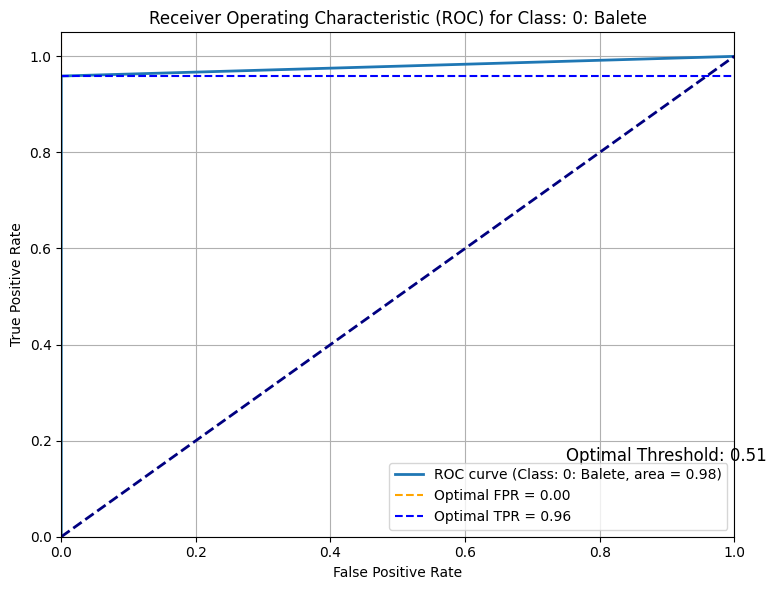

Class '1: Bayabas': Optimal Threshold: 0.57
Class '1: Bayabas': True Positive Rate at Optimal Threshold: 0.96
Class '1: Bayabas': False Positive Rate at Optimal Threshold: 0.30


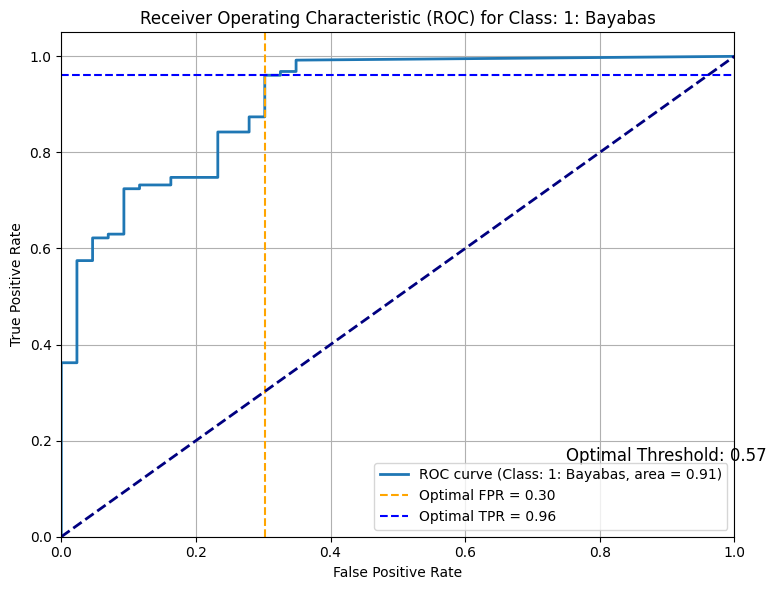

Class '2: Dita': Optimal Threshold: 0.51
Class '2: Dita': True Positive Rate at Optimal Threshold: 1.00
Class '2: Dita': False Positive Rate at Optimal Threshold: 0.00


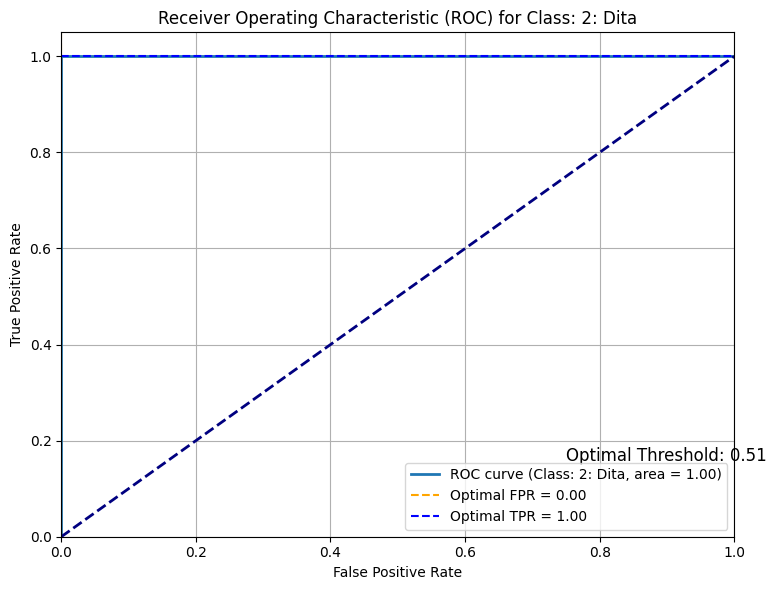

Class '3: Ilang-Ilang': Optimal Threshold: 0.51
Class '3: Ilang-Ilang': True Positive Rate at Optimal Threshold: 0.98
Class '3: Ilang-Ilang': False Positive Rate at Optimal Threshold: 0.00


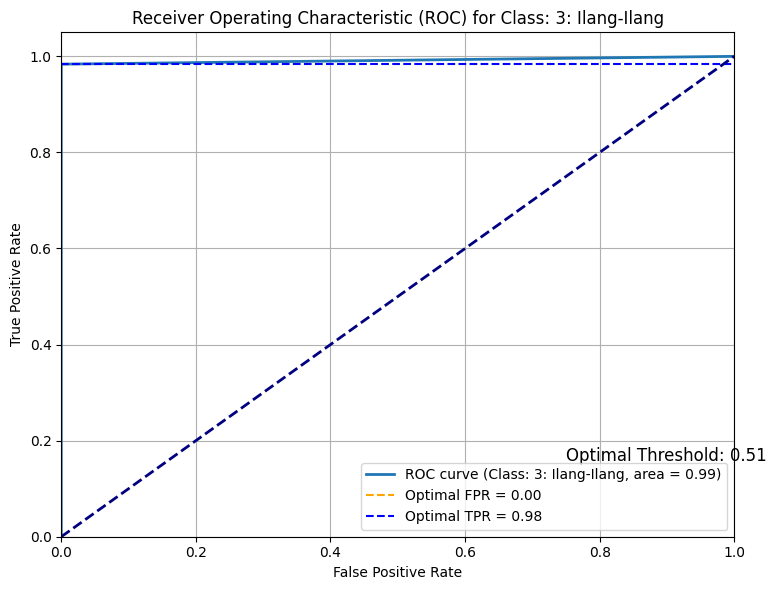

Class '4: Langka': Optimal Threshold: 0.54
Class '4: Langka': True Positive Rate at Optimal Threshold: 0.99
Class '4: Langka': False Positive Rate at Optimal Threshold: 0.10


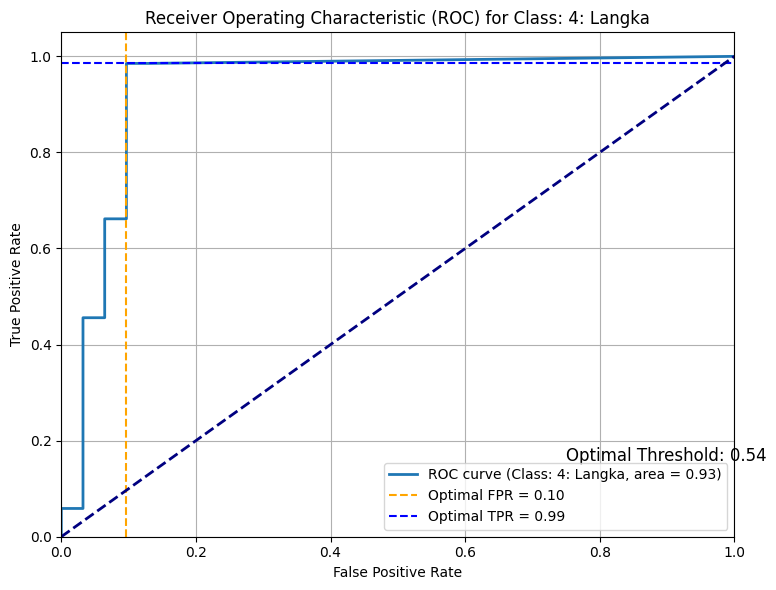

Class '5: Mangga': Optimal Threshold: 0.58
Class '5: Mangga': True Positive Rate at Optimal Threshold: 0.99
Class '5: Mangga': False Positive Rate at Optimal Threshold: 0.09


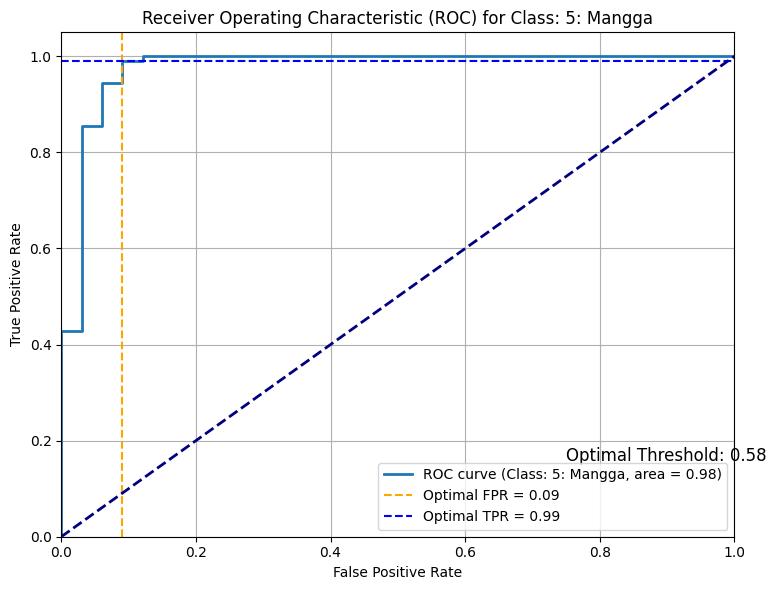

Class '6: Mahogany': Optimal Threshold: 0.77
Class '6: Mahogany': True Positive Rate at Optimal Threshold: 0.93
Class '6: Mahogany': False Positive Rate at Optimal Threshold: 0.03


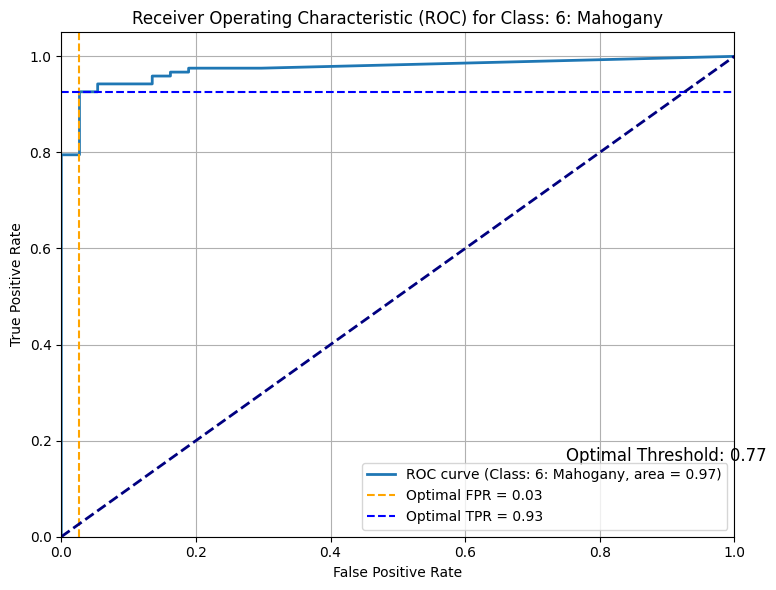

Class '7: Duhat': No positive samples found, skipping ROC calculation.
Class '8: Palo-Maria': Optimal Threshold: 0.58
Class '8: Palo-Maria': True Positive Rate at Optimal Threshold: 0.98
Class '8: Palo-Maria': False Positive Rate at Optimal Threshold: 0.06


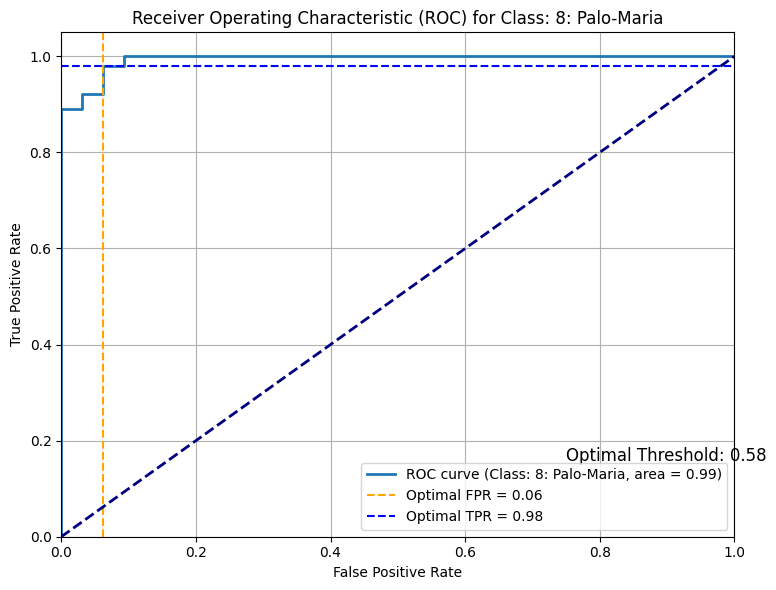

Class '9: Narra': Optimal Threshold: 0.55
Class '9: Narra': True Positive Rate at Optimal Threshold: 0.95
Class '9: Narra': False Positive Rate at Optimal Threshold: 0.15


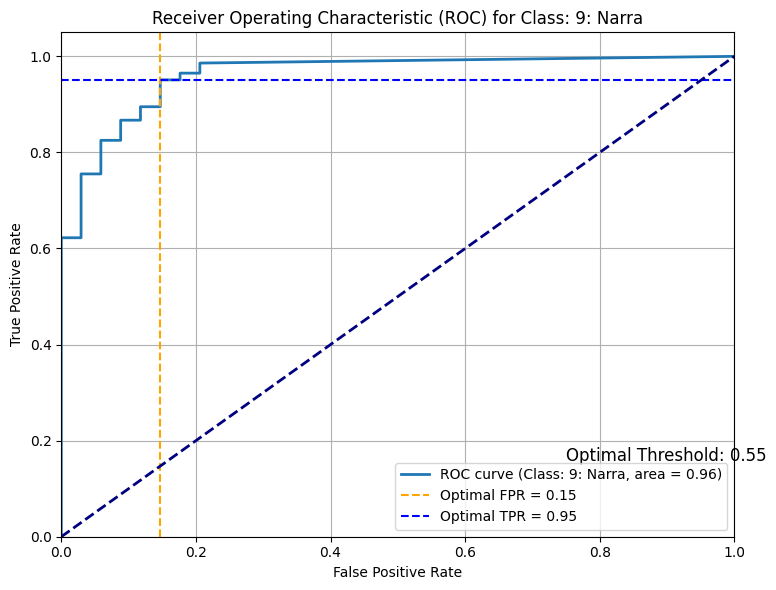

Class '10: Yakal': Optimal Threshold: 0.85
Class '10: Yakal': True Positive Rate at Optimal Threshold: 1.00
Class '10: Yakal': False Positive Rate at Optimal Threshold: 0.03


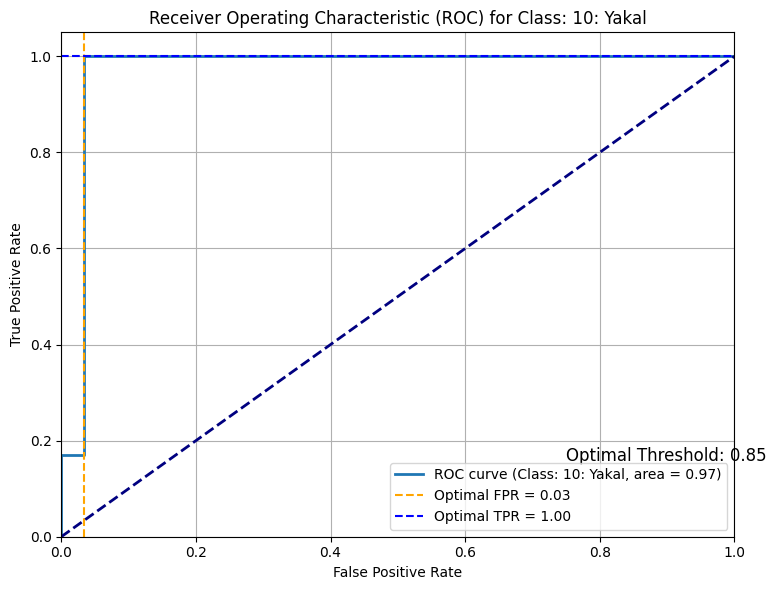

Class '11: Alibangbang': Optimal Threshold: 0.94
Class '11: Alibangbang': True Positive Rate at Optimal Threshold: 0.97
Class '11: Alibangbang': False Positive Rate at Optimal Threshold: 0.00


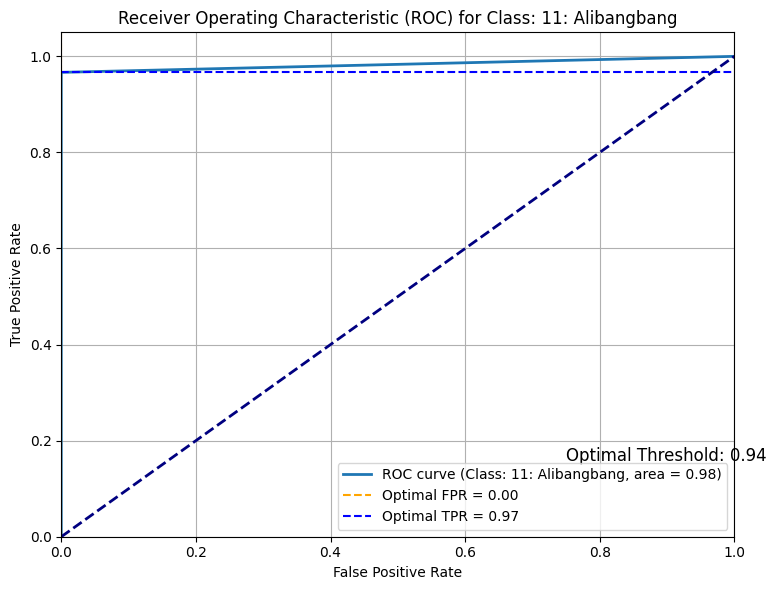

Class '12: Apitong': Optimal Threshold: 0.64
Class '12: Apitong': True Positive Rate at Optimal Threshold: 0.95
Class '12: Apitong': False Positive Rate at Optimal Threshold: 0.00


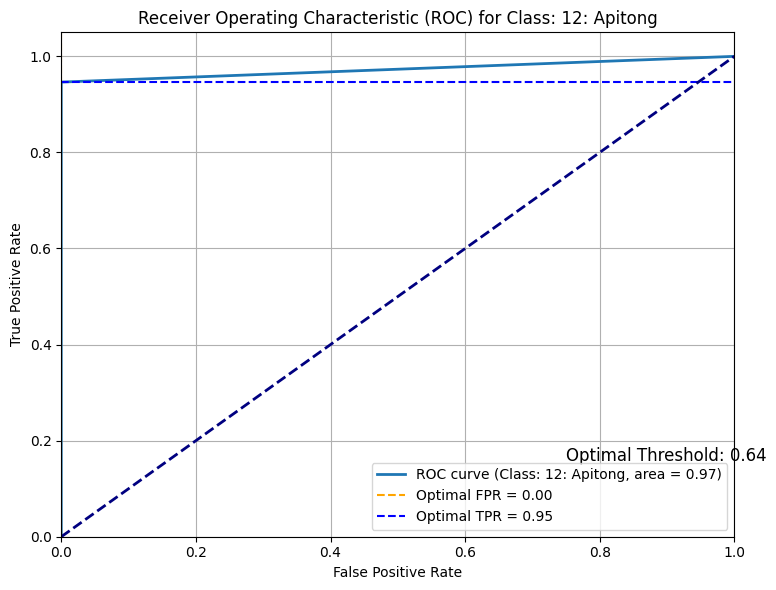

Class '13: Kamagong': Optimal Threshold: 0.93
Class '13: Kamagong': True Positive Rate at Optimal Threshold: 1.00
Class '13: Kamagong': False Positive Rate at Optimal Threshold: 0.00


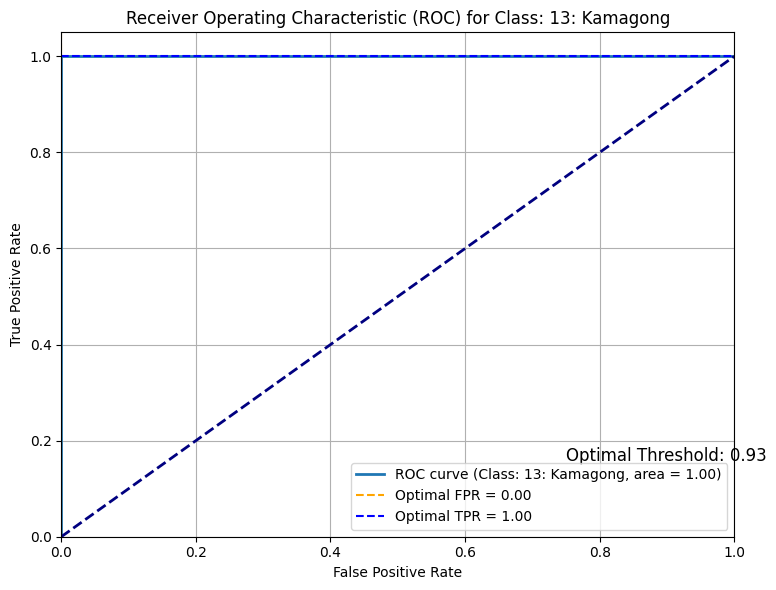

Class '14: Kalios': Optimal Threshold: 0.63
Class '14: Kalios': True Positive Rate at Optimal Threshold: 0.91
Class '14: Kalios': False Positive Rate at Optimal Threshold: 0.00


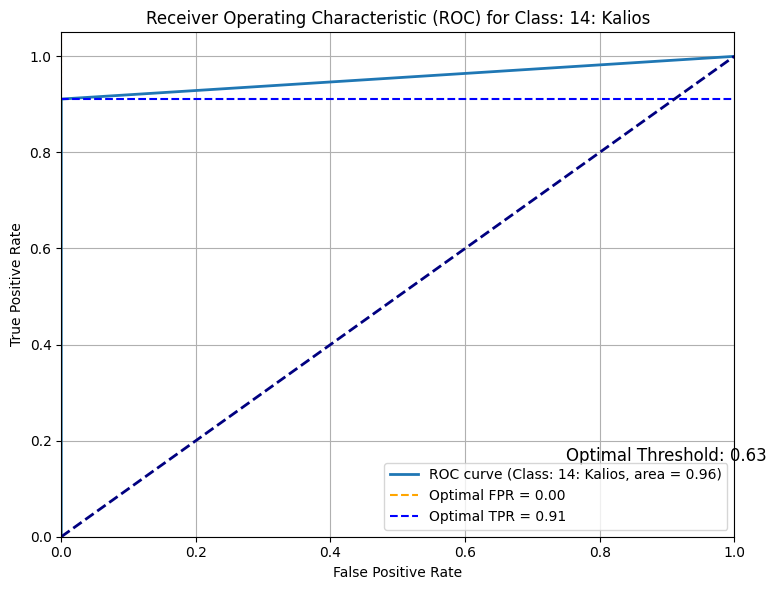

Class '15: Acacia': Optimal Threshold: 0.85
Class '15: Acacia': True Positive Rate at Optimal Threshold: 0.98
Class '15: Acacia': False Positive Rate at Optimal Threshold: 0.00


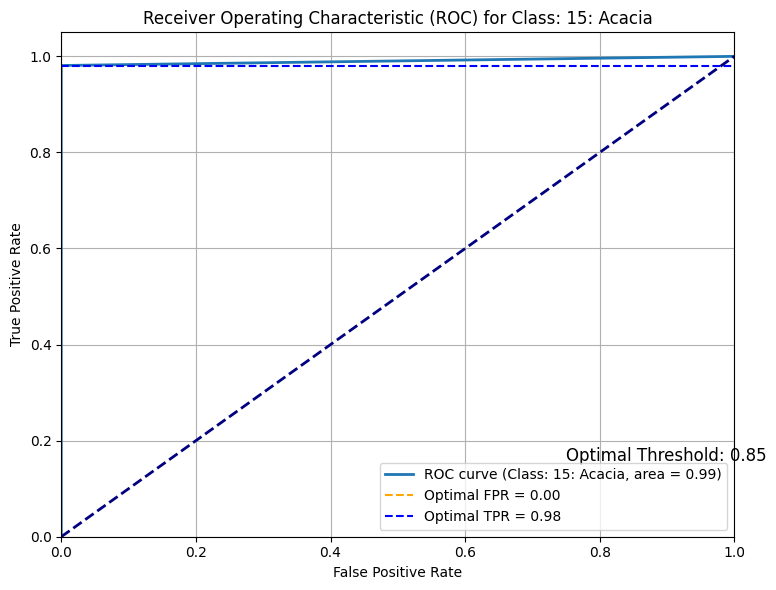

Class '16: Madre-Cacao': Optimal Threshold: 0.60
Class '16: Madre-Cacao': True Positive Rate at Optimal Threshold: 1.00
Class '16: Madre-Cacao': False Positive Rate at Optimal Threshold: 0.00


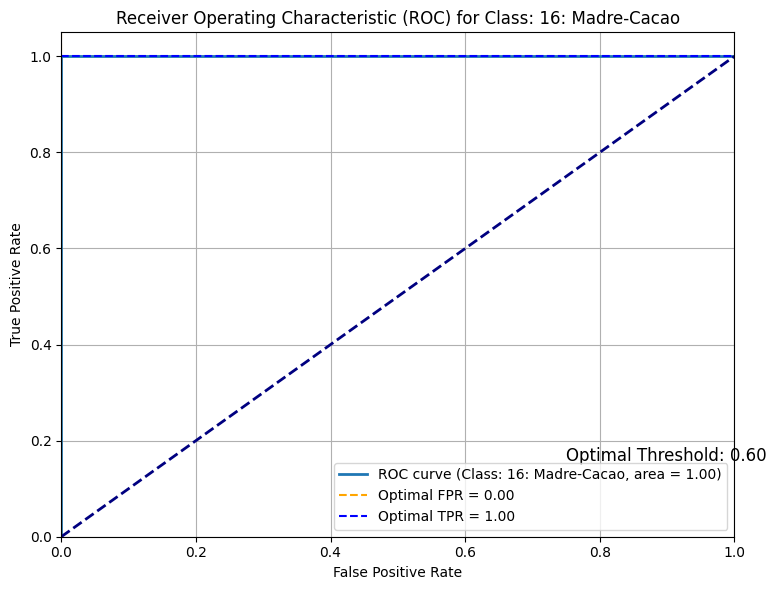

Class '17: Eucalyptus': No positive samples found, skipping ROC calculation.
Class '18: Scramble-Egg': No positive samples found, skipping ROC calculation.
Class '19: Alagao': No positive samples found, skipping ROC calculation.
Class '20: Sintores': No positive samples found, skipping ROC calculation.
Class '21: Tibig': No positive samples found, skipping ROC calculation.
Class '22: Amugis': No positive samples found, skipping ROC calculation.
Class '23: Balayong': No positive samples found, skipping ROC calculation.
Class '24: Bani': No positive samples found, skipping ROC calculation.
Class '25: Banaba': No positive samples found, skipping ROC calculation.
Class '26: Barako': No positive samples found, skipping ROC calculation.
Class '27: Binunga': No positive samples found, skipping ROC calculation.
Class '28: Betis': No positive samples found, skipping ROC calculation.
Class '29: Dao': No positive samples found, skipping ROC calculation.
Class '30: Asis': No positive samples found

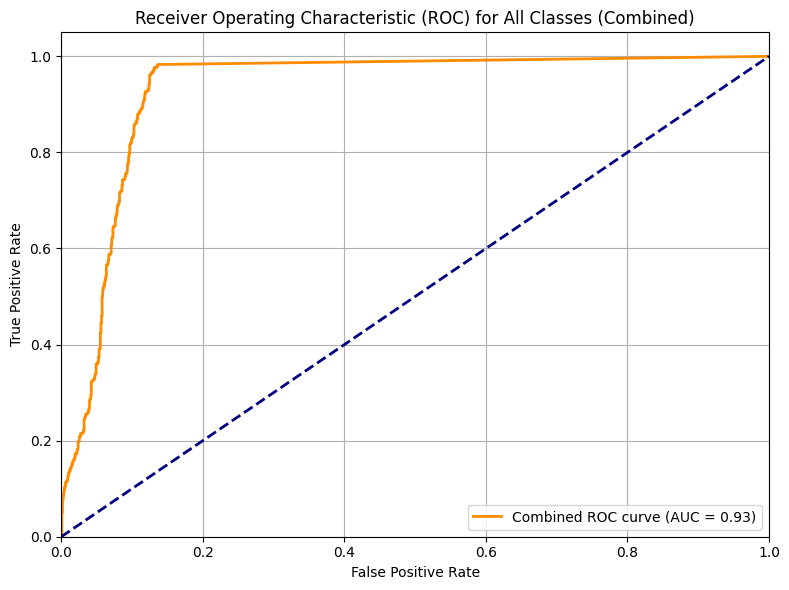

In [1]:
import os
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import torch

# Load your YOLOv8 model
model = YOLO('best36_class.pt')

# Folder containing images (with no subfolders for classes)
image_folder = 'dsds/val/images'  # Update with your actual image folder path
label_folder = 'dsds/val/labels'  # Update with your actual label folder path

# Load your labels from the text file
with open('labels36class.txt', 'r') as f:  # Update with your labels file path
    labels = [line.strip() for line in f.readlines()]

# Initialize lists to store ground truth and predicted confidence scores for all classes
y_true = {i: [] for i in range(len(labels))}  # A dictionary to store true labels per class
y_scores = {i: [] for i in range(len(labels))}  # A dictionary to store scores per class

# Also initialize combined lists for all classes
y_true_combined = []
y_scores_combined = []

# Loop through the images in the image folder
for file in os.listdir(image_folder):
    if file.endswith(('.jpg', '.png', '.jpeg')):  # Add other formats as needed
        image_path = os.path.join(image_folder, file)

        # Corresponding label file path
        label_file = os.path.join(label_folder, file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt'))

        # Run inference on the image using YOLOv8
        results = model.predict(image_path, save=True, imgsz=640, conf=0.5)

        # Initialize true labels for all classes as 0 (no detection)
        true_labels = [0] * len(labels)

        # Read the corresponding label file to get true labels
        if os.path.exists(label_file):
            with open(label_file, 'r') as lf:
                for line in lf.readlines():
                    class_index = int(line.split()[0])  # Assuming the class index is the first element in the label file
                    true_labels[class_index] = 1  # Mark as detected for the class

        # Check detected classes and append the results
        if results and results[0].boxes:
            for box in results[0].boxes:
                class_index = int(box.cls)
                max_conf = box.conf.item() if isinstance(box.conf, torch.Tensor) else box.conf
                y_true[class_index].append(true_labels[class_index])
                y_scores[class_index].append(max_conf)
                # Append to combined list for overall ROC analysis
                y_true_combined.append(true_labels[class_index])
                y_scores_combined.append(max_conf)
        else:
            # If no detections, append zeros for all classes
            for i in range(len(labels)):
                y_true[i].append(true_labels[i])
                y_scores[i].append(0)
                # Append to combined list for overall ROC analysis
                y_true_combined.append(true_labels[i])
                y_scores_combined.append(0)

# Now calculate the ROC curve for each class
for i in range(len(labels)):
    # Convert lists to numpy arrays
    y_true_class = np.array(y_true[i])
    y_scores_class = np.array(y_scores[i])

    # Check if there's enough data to compute the ROC curve for the class
    if np.sum(y_true_class) > 0:
        # Calculate ROC curve for the current class
        fpr, tpr, thresholds = roc_curve(y_true_class, y_scores_class)

        # Calculate the optimal threshold using Youden's J statistic
        J = tpr - fpr
        optimal_idx = np.argmax(J)
        optimal_threshold = thresholds[optimal_idx]
        optimal_tpr = tpr[optimal_idx]
        optimal_fpr = fpr[optimal_idx]

        # Print optimal threshold and corresponding TPR, FPR for the class
        print(f"Class '{labels[i]}': Optimal Threshold: {optimal_threshold:.2f}")
        print(f"Class '{labels[i]}': True Positive Rate at Optimal Threshold: {optimal_tpr:.2f}")
        print(f"Class '{labels[i]}': False Positive Rate at Optimal Threshold: {optimal_fpr:.2f}")

        # Simplified Plotting of ROC Curve for the class
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve (Class: {labels[i]}, area = {auc(fpr, tpr):.2f})')

        # Plot dashed lines for the optimal threshold
        plt.axvline(x=optimal_fpr, color='orange', linestyle='--', label=f'Optimal FPR = {optimal_fpr:.2f}')
        plt.axhline(y=optimal_tpr, color='blue', linestyle='--', label=f'Optimal TPR = {optimal_tpr:.2f}')

        # Annotate the optimal threshold value on the right side of the figure
        plt.text(0.75, 0.15, f'Optimal Threshold: {optimal_threshold:.2f}', fontsize=12, verticalalignment='bottom', color='black')

        # Basic plot settings
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) for Class: {labels[i]}')
        plt.legend(loc='lower right')
        plt.grid()
        plt.tight_layout()  # Adjust layout
        plt.show()
    else:
        print(f"Class '{labels[i]}': No positive samples found, skipping ROC calculation.")

# Combine all classes and plot a single summary ROC curve
y_true_combined = np.array(y_true_combined)
y_scores_combined = np.array(y_scores_combined)

# Calculate ROC curve for the entire dataset (all classes)
fpr_combined, tpr_combined, thresholds_combined = roc_curve(y_true_combined, y_scores_combined)

# Calculate the area under the curve (AUC)
auc_combined = auc(fpr_combined, tpr_combined)

# Plot the combined ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_combined, tpr_combined, color='darkorange', lw=2, label=f'Combined ROC curve (AUC = {auc_combined:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set axis limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for All Classes (Combined)')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()  # Adjust layout
plt.show()

